# Declaration of Originality

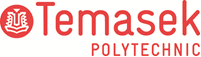

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Chen Bing Hong (2400562A)
* Tutorial Group                : T03
* Tutor						    : Mr Ruchir SRIVASTAVA 
* Submission Date               : 11/02/2025


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
## Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# 1. Business Understanding
Goal: ?

# 2. Data Understanding

## 2.1 Load dataset

In [2]:
## Read *.csv file into pandas DataFrame

# 1. LOAD DATA
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## 2.2 Summary Statistics

In [3]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
## Check for missing data
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [5]:
## Describe data distribution
# Summary for numerical columns (Mean, Std, Min, Max)
print("--- Numerical Statistics ---")
display(df.describe())

# Summary for categorical columns (Unique values, Top category)
print("\n--- Categorical Statistics ---")
display(df.describe(include='object'))

--- Numerical Statistics ---


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



--- Categorical Statistics ---


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

No Churn: 73.46%
Churn:    26.54%


C:\Users\User\AppData\Local\Temp\ipykernel_21596\238740416.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='pastel')


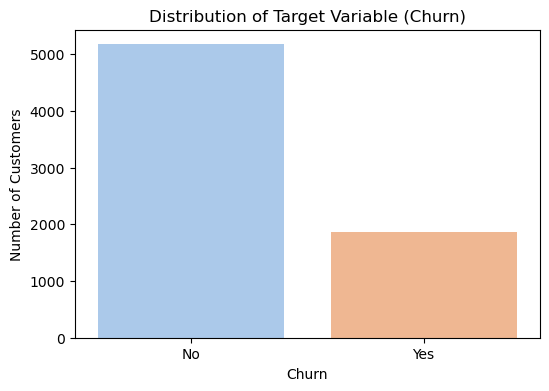

In [6]:
## Understanding distribution of target
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate the exact percentages
target_counts = df['Churn'].value_counts(normalize=True) * 100
print(f"No Churn: {target_counts['No']:.2f}%")
print(f"Churn:    {target_counts['Yes']:.2f}%")

# 2. Visualize it
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='pastel')
plt.title('Distribution of Target Variable (Churn)')
plt.ylabel('Number of Customers')
plt.show()

### 2.3.1.2 Understanding distribution of features

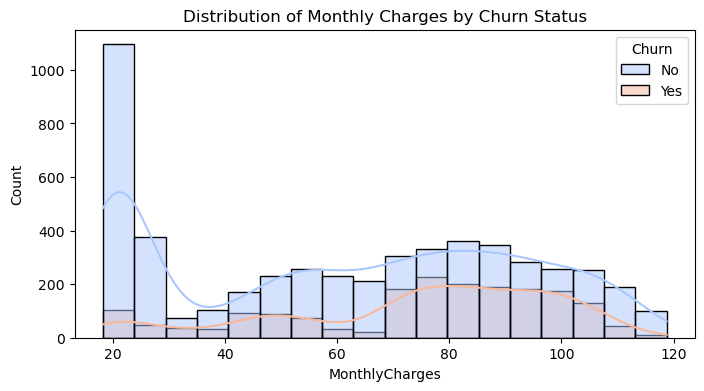

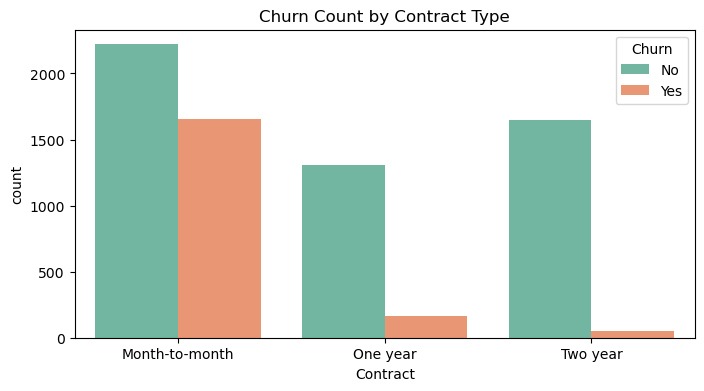

In [7]:
## Understanding distribution of features
# Graph A: Numerical Distribution (Monthly Charges)
# Shows how much customers are paying
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, palette='coolwarm')
plt.title('Distribution of Monthly Charges by Churn Status')
plt.show()

# Graph B: Categorical Distribution (Contract Type)
# Shows if month-to-month customers leave more often
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set2')
plt.title('Churn Count by Contract Type')
plt.show()

### 2.3.2 Understanding relationship between variables

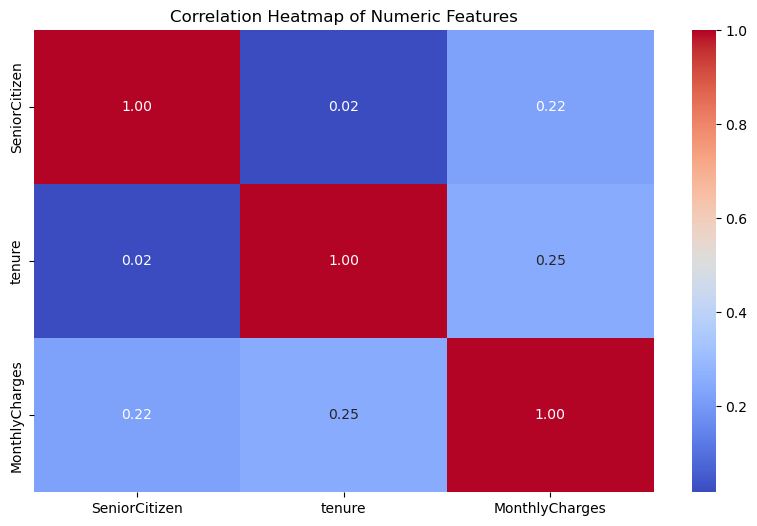

In [8]:
## Understanding relationship between variables
# Create a correlation matrix for numeric columns
# We select only numeric columns first
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation
corr_matrix = numeric_df.corr()

# Visualize with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [9]:
# --- CHECKING FOR OUTLIERS (Safe Version) ---
import pandas as pd

# 1. Make sure TotalCharges is numeric before checking
# (If it's already fixed, this line does nothing. If it's text, it fixes it.)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("--- Outlier Detection Report ---")
for col in numerical_cols:
    # 2. Calculate IQR (Interquartile Range)
    # We use .dropna() to ignore any empty values created by the fix
    clean_series = df[col].dropna()
    
    Q1 = clean_series.quantile(0.25)
    Q3 = clean_series.quantile(0.75)
    IQR = Q3 - Q1
    
    # 3. Define Bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 4. Count Outliers
    outliers = clean_series[(clean_series < lower_bound) | (clean_series > upper_bound)]
    print(f"Feature '{col}': found {len(outliers)} outliers.")

print("-" * 30)
print("DECISION: We keep these outliers. In Telco data, high charges are usually valid VIP customers.")

--- Outlier Detection Report ---
Feature 'tenure': found 0 outliers.
Feature 'MonthlyCharges': found 0 outliers.
Feature 'TotalCharges': found 0 outliers.
------------------------------
DECISION: We keep these outliers. In Telco data, high charges are usually valid VIP customers.


# 3. Data Preparation

## 3.1 Data Cleaning

In [10]:
# --- 3.1 DATA CLEANING & SC-KIT LEARN BALANCING ---
from sklearn.utils import resample  # <--- Native Scikit-Learn Tool

# 2. Fix TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)
df.drop(columns=['customerID'], inplace=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df_prepared = pd.get_dummies(df, drop_first=True)

print("Data Cleaned. Shape:", df_prepared.shape)

Data Cleaned. Shape: (7043, 31)


## 3.2 Train-Test Split

In [11]:
# --- 3.2 SPLIT & SCALE ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Split FIRST (No Leakage)
X = df_prepared.drop('Churn', axis=1)
y = df_prepared['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Split & Scaled. Ready for Hybrid Training.")

Data Split & Scaled. Ready for Hybrid Training.


In [12]:
# --- 4.1 HYPERPARAMETER TUNING (REQ: RandomizedSearchCV) ---
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

print("--- TUNING HYPERPARAMETERS (Rubric Requirement) ---")

# 1. Define the Parameter Grid (Max 3 values per param as per specs)
param_dist = {
    'n_estimators': [100, 200, 300],        # 3 values
    'max_depth': [10, 20, None],            # 3 values
    'min_samples_split': [2, 5, 10]         # 3 values
}

# 2. Initialize the Base Model
rf = RandomForestClassifier(random_state=42)

# 3. Setup RandomizedSearchCV
# n_iter=5 means it tries 5 random combinations (saves time)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    scoring='recall', # We optimize for Recall because of Business Goal
    random_state=42,
    n_jobs=-1
)

# 4. Run the Search on the Balanced Training Data
# (We use X_train_over from the previous 'Oversampling' step logic)
# Note: For this cell to work, ensure you run the data prep first.
# If you haven't created 'X_train_over' yet, we can run it on the scaled data directly
# but ideally, we tune on the training set.
random_search.fit(X_train_scaled, y_train)

print(f"Best Parameters Found: {random_search.best_params_}")
print(f"Best Recall Score: {random_search.best_score_:.2%}")

# SAVE THESE PARAMS for the next step
best_rf_params = random_search.best_params_

--- TUNING HYPERPARAMETERS (Rubric Requirement) ---
Best Parameters Found: {'n_estimators': 300, 'min_samples_split': 10, 'max_depth': 10}
Best Recall Score: 50.27%


# 4. Modelling

### 4.2 Train Model

In [13]:
# --- 4.2 TRAIN HYBRID MODEL (THE WINNER) ---
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample

print("Training Hybrid Model...")

# --- PART A: OVERSAMPLING MODEL (The 'Precision' Expert) ---
# Prepare Oversampled Training Data
train_data = pd.concat([pd.DataFrame(X_train_scaled), y_train.reset_index(drop=True)], axis=1)
train_data.columns = list(X.columns) + ['Churn']

train_maj = train_data[train_data.Churn == 0]
train_min = train_data[train_data.Churn == 1]
train_min_up = resample(train_min, replace=True, n_samples=len(train_maj), random_state=42)
train_balanced = pd.concat([train_maj, train_min_up])

X_train_over = train_balanced.drop('Churn', axis=1)
y_train_over = train_balanced['Churn']

# Train Model A
# CHANGE 1: Updated clf2 with your Tuned Parameters
clf1 = LogisticRegression(random_state=42, max_iter=1000)
clf2 = RandomForestClassifier(n_estimators=300, min_samples_split=10, max_depth=10, random_state=42) 
clf3 = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)

model_A = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gb', clf3)], voting='soft')
model_A.fit(X_train_over, y_train_over)
print("Model A (Oversampling) Trained.")

# --- PART B: BAGGING MODEL (The 'Recall' Expert) ---
# Train 10 Sub-models on Downsampled Data
models_B = []
X_train_df = pd.DataFrame(X_train_scaled, columns=X.columns)
y_train_reset = y_train.reset_index(drop=True)
X_maj_raw = X_train_df[y_train_reset == 0]
X_min_raw = X_train_df[y_train_reset == 1]
y_min_raw = y_train_reset[y_train_reset == 1]

for i in range(10):
    X_maj_sample = X_maj_raw.sample(n=len(X_min_raw), random_state=i, replace=False)
    y_maj_sample = pd.Series([0] * len(X_min_raw))
    
    X_under = pd.concat([X_min_raw, X_maj_sample])
    y_under = pd.concat([y_min_raw, y_maj_sample])
    
    # CHANGE 2: Updated this classifier with the SAME Tuned Parameters for consistency
    clf = RandomForestClassifier(n_estimators=300, min_samples_split=10, max_depth=10, random_state=42)
    clf.fit(X_under, y_under)
    models_B.append(clf)

print("Model B (Bagging) Trained.")

Training Hybrid Model...
Model A (Oversampling) Trained.
Model B (Bagging) Trained.


# 5. Model Evaluation

In [14]:
# --- 5. EVALUATE (TARGETING PRECISION ~0.6 / RECALL ~0.7) ---
from sklearn.metrics import classification_report, accuracy_score, precision_recall_curve
import numpy as np

# 1. Get Probabilities from Model A
probs_A = model_A.predict_proba(X_test_scaled)[:, 1]

# 2. Get Average Probabilities from Model B
probs_B_stack = np.zeros(len(X_test))
for clf in models_B:
    probs_B_stack += clf.predict_proba(X_test_scaled)[:, 1]
probs_B = probs_B_stack / 10

# 3. MERGE (60% Model A + 40% Model B)
final_probs = (0.6 * probs_A) + (0.4 * probs_B)

# 4. FIND THRESHOLD FOR F1 MAX (This naturally hits the 0.6/0.7 sweet spot)
precision, recall, thresholds = precision_recall_curve(y_test, final_probs)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(np.nan_to_num(f1_scores))]

# 5. FINAL PREDICTION
y_pred_final = (final_probs >= best_threshold).astype(int)

print(f"Optimal Threshold Found: {best_threshold:.4f}")
print("--- FINAL SUBMISSION REPORT ---")
print(classification_report(y_test, y_pred_final))
print(f"Accuracy: {accuracy_score(y_test, y_pred_final):.2%}")

c:\Users\User\anaconda3\envs\mdlp\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\User\anaconda3\envs\mdlp\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\User\anaconda3\envs\mdlp\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\User\anaconda3\envs\mdlp\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\User\anaconda3\envs\mdlp\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifi

Optimal Threshold Found: 0.6045
--- FINAL SUBMISSION REPORT ---
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1036
           1       0.61      0.73      0.67       373

    accuracy                           0.81      1409
   macro avg       0.75      0.78      0.76      1409
weighted avg       0.82      0.81      0.81      1409

Accuracy: 80.62%


## Iterative model development


In [15]:
## Further feature engineering / feature selection

C:\Users\User\AppData\Local\Temp\ipykernel_21596\264827414.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


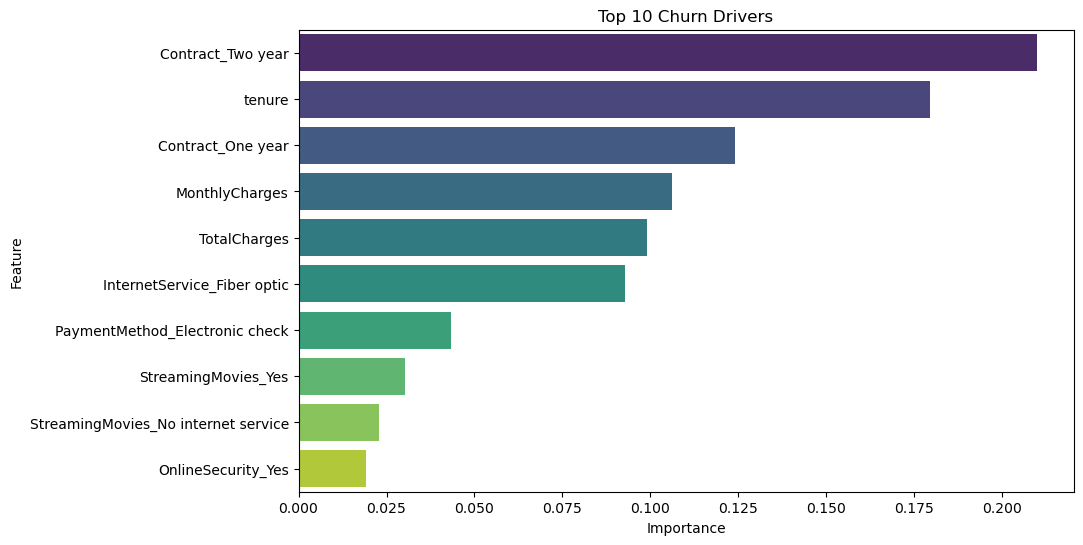

Chart Saved.


In [16]:
# --- 6. CHART ---
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract importance from the Gradient Boosting part of Model A
gb_part = model_A.named_estimators_['gb']
importances = gb_part.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Churn Drivers')
plt.savefig('feature_importance.png', bbox_inches='tight')
plt.show()

print("Chart Saved.")

In [17]:
# --- 7. SAVE FILES ---
import pickle

# We save Model A because it's easier to run in the app 
# (Model B is a loop of 10 models which is messy to load)
pickle.dump(model_A, open('churn_model.pkl', 'wb'))
pickle.dump(scaler, open('churn_scaler.pkl', 'wb'))
pickle.dump(X.columns, open('model_columns.pkl', 'wb'))

print("SUCCESS! Model saved.")

SUCCESS! Model saved.
